Silhouette Score: 0.18588002191620015


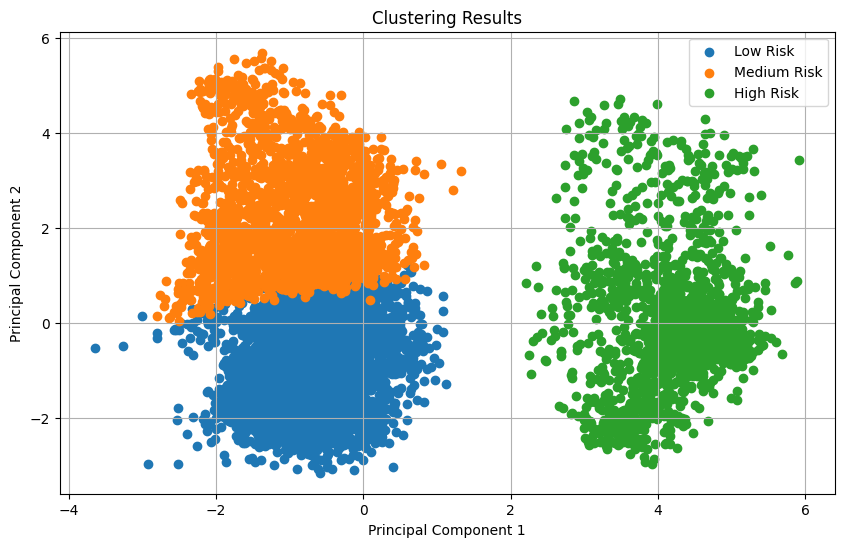

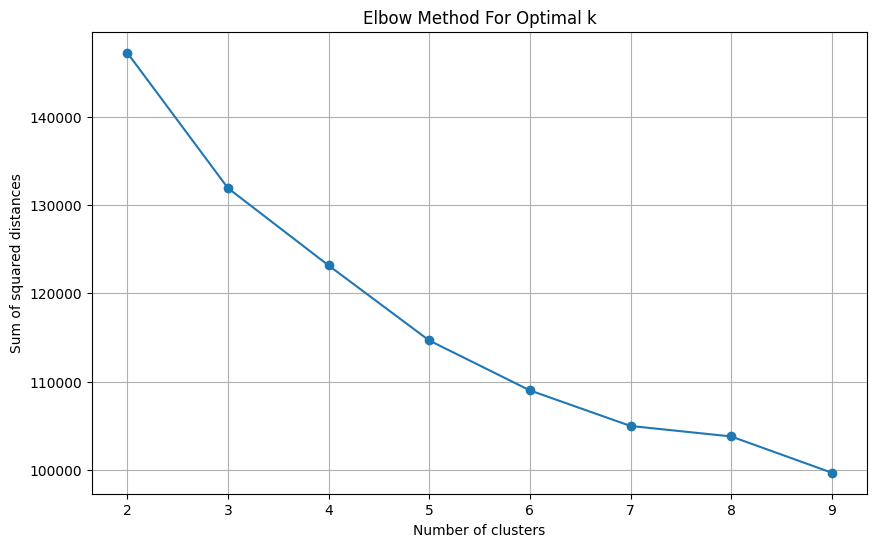

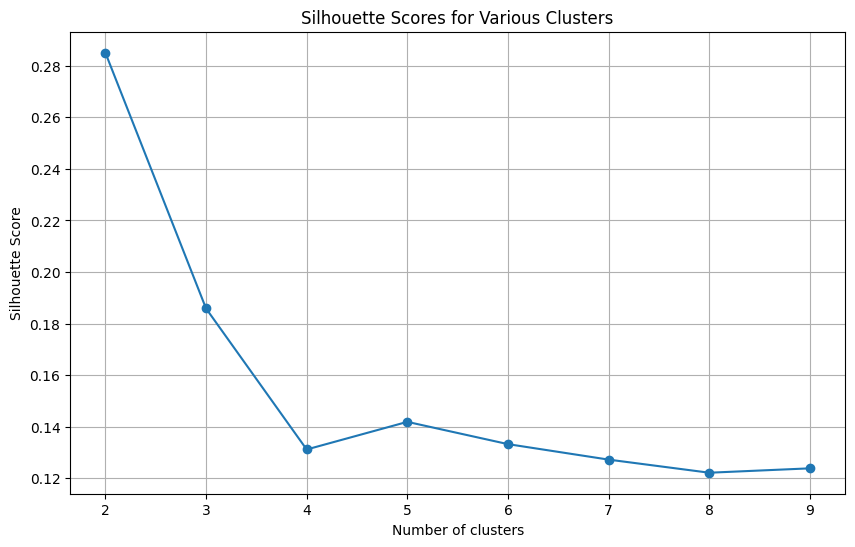

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load your dataset
data = pd.read_csv('BankChurners.csv')

# Drop unnecessary columns and one-hot encode categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data = pd.get_dummies(data.drop(columns=categorical_features), drop_first=True)

# Normalize numerical featuresc
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Choose the number of clusters (K)
n_clusters = 3  # Example: You can choose any suitable number of clusters

# Apply K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Map cluster labels to risk categories
cluster_labels_mapping = {
    0: 'Low Risk',
    1: 'Medium Risk',
    2: 'High Risk'
}

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot clustered data with risk category labels
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(data_pca[cluster_labels == cluster, 0], data_pca[cluster_labels == cluster, 1], label=cluster_labels_mapping[cluster])

plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of clusters to evaluate
range_n_clusters = list(range(2, 10))  # Here we check from 2 to 9 clusters

# Compute the sum of squared distances (inertia)
inertias = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for each k
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to see which has the highest score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Apply K-means with the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Get the new cluster labels
cluster_labels = kmeans.labels_

# Calculate the new Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f"Updated Silhouette Score with k={optimal_k}: {silhouette_avg}")


Updated Silhouette Score with k=2: 0.2850251265086809


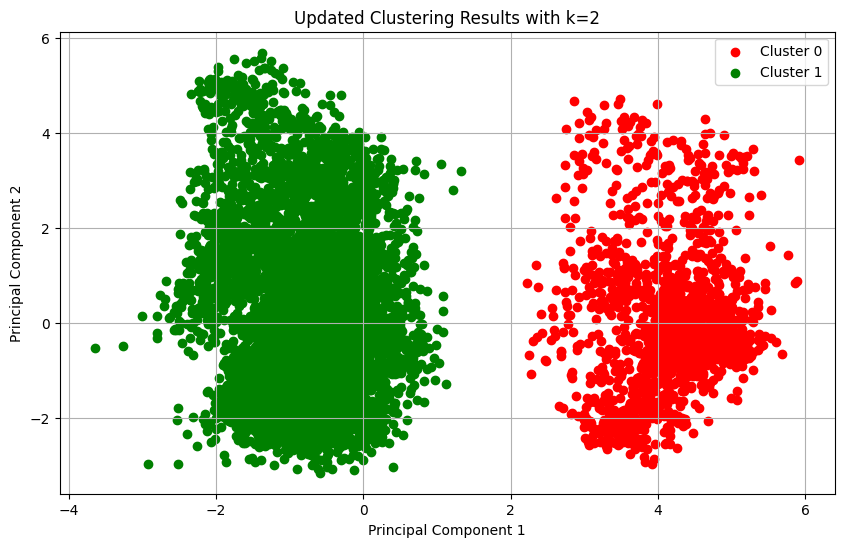

In [3]:
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the new clustered data
plt.figure(figsize=(10, 6))
colors = ['red', 'green']
for cluster, color in zip(range(optimal_k), colors):
    plt.scatter(data_pca[cluster_labels == cluster, 0], data_pca[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster}', color=color)

plt.title('Updated Clustering Results with k=2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
